In [1]:
import pandas as pd


fi_CAS = pd.DataFrame.from_csv("Final_CAS.csv")
fi_CAS.head()

,Class,Sample,Date,Peak,scan_number,Intensity,Area%,CAS_ID,Quality,Peak_ID,RI,Sample_ID
67,CU,CU3,2015/11/03,42,3905,85027,0.11,000100-66-3,95.0,CU3-1103-42,922.333932,CU3-1103
223,CU,CU3,2015/11/25,31,3527,52072,0.19,000100-66-3,96.0,CU3-1125-31,935.541045,CU3-1125
468,CU,CU3,2015/11/07,31,3877,54512,0.16,000100-66-3,96.0,CU3-1107-31,917.889273,CU3-1107
783,CU,CU4,2015/11/26,35,3525,33200,0.07,000100-66-3,93.0,CU4-1126-35,935.037175,CU4-1126
1472,CU,CU4,2015/11/07,36,3876,48252,0.12,000100-66-3,95.0,CU4-1107-36,917.726330,CU4-1107


In [2]:
CAS_id_list = list(fi_CAS.CAS_ID.unique())
Sample_id_list = list(fi_CAS.Sample_ID.unique())
CAS_dic = {}
for i in CAS_id_list :
    CAS_dic[i] = 0
# all setting with 0 value

In [3]:
# CAS_id_list
Mat_lt = []

for i in Sample_id_list :
    K = []
    # print i
    K.append(i)
    m = fi_CAS[fi_CAS["Sample_ID"]== i]
    for j in CAS_id_list :
        if j in list(m.CAS_ID) :
            Ar = m[m["CAS_ID"] == j].values.tolist()[0][6]
            # print Ar
            K.append(Ar)
        else :
            # print 0
            K.append(0.0)
    Mat_lt.append(K)

In [5]:
Mat_df = pd.DataFrame(Mat_lt)
# Mat_df.head()
columns = {}
columns[0] = "Sample_ID"

for index,z in enumerate(CAS_id_list) :
    # print index+1,z
    columns[index+1] = z

Mat_df = Mat_df.rename(columns = columns)
Mat_df.head()

,Sample_ID,000100-66-3,000105-68-0,000100-52-7,000142-92-7,001565-80-6,000111-27-3,000108-88-3,061692-83-9,000071-36-3,...,002601-13-0,000541-05-9,017312-54-8,054004-43-2,017699-05-7,000093-89-0,000624-13-5,000539-82-2,999556-92-5,000141-62-8
0,CU3-1103,0.11,1.89,0.0,5.90,0.0,0.0,0.67,0.0,0.60,...,0.0,7.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CU3-1125,0.19,0.00,0.0,4.20,0.0,0.0,0.00,0.0,0.00,...,0.0,10.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CU3-1107,0.16,3.92,0.0,5.17,0.0,0.0,0.40,0.0,0.34,...,0.0,7.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CU4-1126,0.07,0.00,0.0,7.92,0.0,0.0,0.00,0.0,0.00,...,0.0,5.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CU4-1107,0.12,2.26,0.0,4.94,0.0,0.0,0.45,0.0,0.52,...,0.0,7.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
columns = {}
columns[0] = "Sample_ID"

for index,z in enumerate(CAS_id_list) :
    # print index+1,z
    columns[index+1] = z

Mat_df = Mat_df.rename(columns = columns)
Mat_df.head()

Mat_df.to_csv("Multi_Para_sample.csv")

# WOW

In [ ]:
from sklearn.preprocessing import StandardScaler

L = Mat_df.ix[:,1:].values
Y = X = Mat_df.ix[:,0].values

X_std = StandardScaler().fit_transform(L)
# X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    '''for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)'''
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
Mat_df.corr().head()

,000100-66-3,000105-68-0,000100-52-7,000142-92-7,001565-80-6,000111-27-3,000108-88-3,061692-83-9,000071-36-3,999199-74-1,...,002601-13-0,000541-05-9,017312-54-8,054004-43-2,017699-05-7,000093-89-0,000624-13-5,000539-82-2,999556-92-5,000141-62-8
000100-66-3,1.000000,0.108994,-0.182958,0.306711,0.100452,-0.187563,-0.112785,-0.044630,-0.182509,0.103964,...,-0.088697,0.361536,-0.093368,0.167321,-0.040058,-0.107713,-0.013868,-0.226516,0.041246,0.041045
000105-68-0,0.108994,1.000000,-0.143474,0.203140,0.100439,-0.138352,0.126263,0.036532,0.033137,0.061558,...,0.063495,-0.047025,0.192191,-0.101164,0.062044,-0.090394,0.080940,-0.188024,0.006011,0.160272
000100-52-7,-0.182958,-0.143474,1.000000,-0.152366,-0.038535,0.107996,0.360738,-0.041058,0.099214,-0.030256,...,-0.054168,0.129301,-0.030467,-0.042491,-0.017641,-0.037967,-0.038486,-0.019039,0.001316,0.419170
000142-92-7,0.306711,0.203140,-0.152366,1.000000,-0.027196,-0.180100,0.072732,0.115668,0.195227,0.267032,...,0.131152,-0.120491,-0.036734,0.016140,0.173450,-0.168744,0.048160,0.150412,-0.035356,-0.116849
001565-80-6,0.100452,0.100439,-0.038535,-0.027196,1.000000,-0.038256,-0.048683,-0.023758,0.099875,-0.027346,...,-0.040654,0.035227,-0.023536,-0.024587,-0.031625,-0.021969,-0.022269,0.118224,-0.021538,-0.055708


# Retest

http://chrisalbon.com/python/pandas_with_seaborn.html 

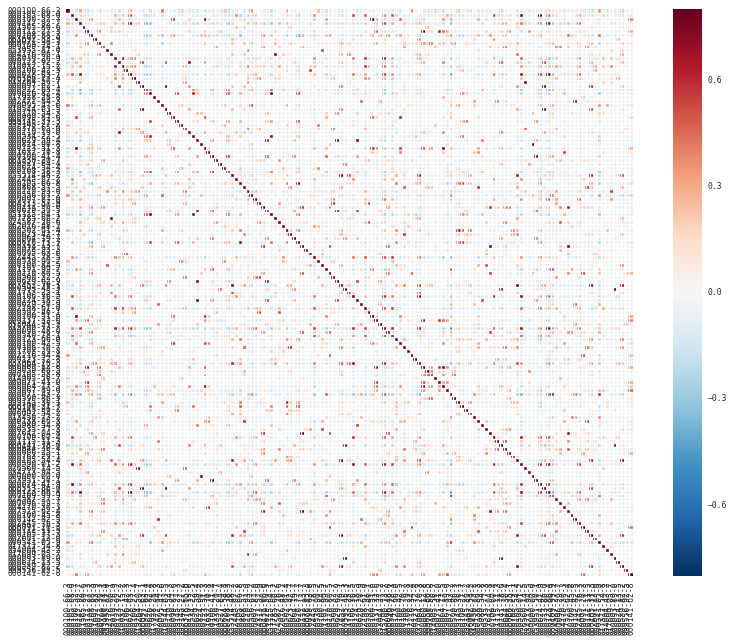

In [18]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
# df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)


corrmat = Mat_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

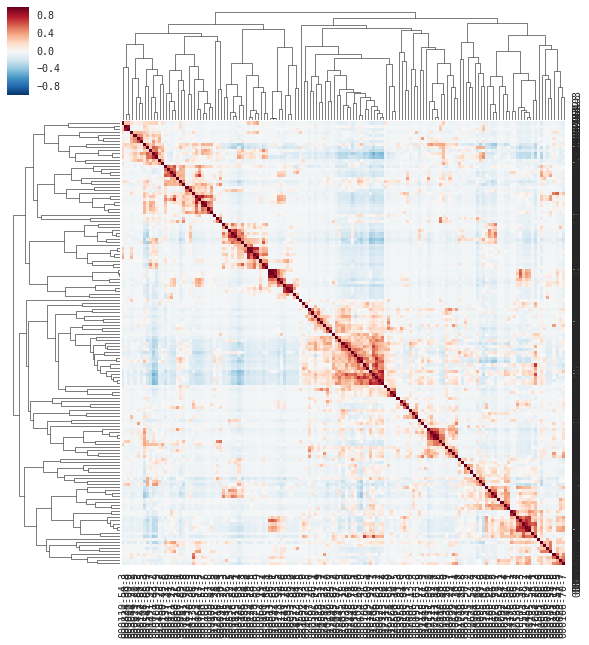

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
get_ipython().magic(u'matplotlib inline')

# m = np.random.rand(50, 50)
# df = pd.DataFrame(m, columns=range(4123, 4173), index=range(4123, 4173))
df = Mat_df.corr()
sns.clustermap(df, metric="correlation")

http://stackoverflow.com/questions/34572177/labels-for-clustermap-in-seaborn 

In [40]:
# df